# Training strategies

In [1]:
import copy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
original_data = copy.deepcopy(data)
target = 'IS_TOXIC'
positive = 'positive'
negative = 'negative'
print(data['IS_TOXIC'].value_counts())
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels: np.ndarray = pd.unique(y)

negative    8251
positive     741
Name: IS_TOXIC, dtype: int64


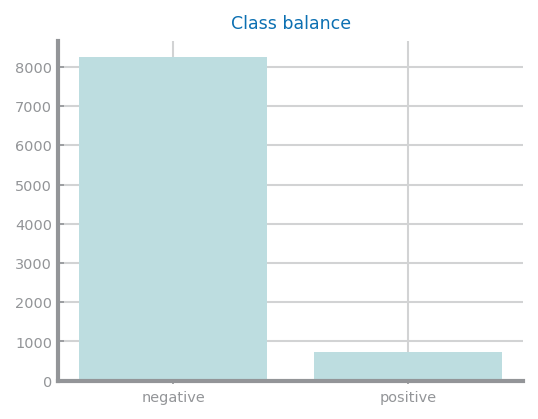

IS_TOXIC = Positive Minority class: 741
IS_TOXIC = Negative Majority class: 8251
Proportion: 0.09 : 1


In [2]:
target_count = original_data['IS_TOXIC'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('IS_TOXIC = Positive Minority class:', target_count[ind_min_class])
print('IS_TOXIC = Negative Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

Given the prior proportion, we consider that a Data Balancing Technique is needed.

# Unbalanced Naive Bayes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import *
import ds_functions as ds

data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)

## Multinomial

In [5]:
clf = MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.8543587842846553, 'test_precision': 0.3073872087258304, 'test_recall': 0.6144144144144145}


## Gaussian

In [6]:
clf = GaussianNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7574499629355078, 'test_precision': 0.2092522861753631, 'test_recall': 0.7009009009009008}


## Bernoulli

In [7]:
clf = BernoulliNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7876945885841364, 'test_precision': 0.22696139476961394, 'test_recall': 0.6567567567567567}


# Preparing data for balancing

In [4]:
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)

In [5]:
import random
def balancing(trnX, trnY, undersample, oversample):
    #undersample, oversample = 1,0 => undersample
    #undersample, oversample = 0,1 => oversample
    unique, counts = np.unique(trnY, return_counts=True)
    
    min_positive_counts = min(counts)
    min_negative_counts = max(counts)+(min(counts)-max(counts))*undersample
    newtrnY: np.ndarray = []
    newtrnX: np.ndarray = []
    for idx in range(len(trnY)):
        if min_positive_counts > 0 and trnY[idx] == 'positive':
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_positive_counts -= 1
        elif min_negative_counts > 0 and trnY[idx] == 'negative':
            newtrnY.append(trnY[idx])
            newtrnX.append(trnX[idx])
            min_negative_counts -= 1
            
    unique1, counts1 = np.unique(newtrnY, return_counts=True)
    
    max_positive_counts = min(counts1)+(max(counts1)-min(counts1))*oversample
    max_negative_counts = max(counts1)
    finaltrnY: np.ndarray = []
    finaltrnX: np.ndarray = []
    negX: np.ndarray = []
    posX: np.ndarray = []
    negY: np.ndarray = []
    posY: np.ndarray = []
        
    for idx in range(len(newtrnY)):
        if newtrnY[idx] == 'negative':
            finaltrnY.append(newtrnY[idx])
            negY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            negX.append(newtrnX[idx])
            max_negative_counts -= 1
        elif newtrnY[idx] == 'positive':
            finaltrnY.append(newtrnY[idx])
            posY.append(newtrnY[idx])
            finaltrnX.append(newtrnX[idx])
            posX.append(newtrnX[idx])
            max_positive_counts -= 1

    random.seed()

    while max_negative_counts > 0:
        rand_num = random.randint(0,len(negX)-1)
        finaltrnX.append(negX[rand_num])
        finaltrnY.append(negY[rand_num])
        max_negative_counts -= 1

    while max_positive_counts > 0:
        rand_num = random.randint(0,len(posX)-1)
        finaltrnX.append(posX[rand_num])
        finaltrnY.append(posY[rand_num])
        max_positive_counts -= 1
    
    return finaltrnX, finaltrnY
    

# UnderSample Naive Bayes

## Multinomial

In [12]:
clf = MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    undertrnX, undertrnY = balancing(trnX,trnY,1,0)
    clf.fit(undertrnX, undertrnY)
    prd_trn = clf.predict(undertrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7714010378057821, 'test_precision': 0.22044076822842898, 'test_recall': 0.701081081081081}


## Gaussian

In [13]:
clf = GaussianNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    undertrnX, undertrnY = balancing(trnX,trnY,1,0)
    clf.fit(undertrnX, undertrnY)
    prd_trn = clf.predict(undertrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7201927353595255, 'test_precision': 0.1893102000839513, 'test_recall': 0.7313513513513513}


## Bernoulli

In [14]:
clf = BernoulliNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    undertrnX, undertrnY = balancing(trnX,trnY,1,0)
    clf.fit(undertrnX, undertrnY)
    prd_trn = clf.predict(undertrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7063528539659006, 'test_precision': 0.18007495175261434, 'test_recall': 0.7229279279279279}


# OverSample Naive Bayes

## Multinomial

In [15]:
clf = MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    overtrnX, overtrnY = balancing(trnX, trnY, 0, 1)
    clf.fit(overtrnX, overtrnY)
    prd_trn = clf.predict(overtrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7953817642698295, 'test_precision': 0.2401511572980633, 'test_recall': 0.687027027027027}


## Gaussian

In [16]:
clf = GaussianNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    overtrnX, overtrnY = balancing(trnX, trnY, 0, 1)
    clf.fit(overtrnX, overtrnY)
    prd_trn = clf.predict(overtrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7481616011860638, 'test_precision': 0.20285543546040324, 'test_recall': 0.7033783783783784}


## Bernoulli

In [17]:
clf = BernoulliNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    overtrnX, overtrnY = balancing(trnX, trnY, 0, 1)
    clf.fit(overtrnX, overtrnY)
    prd_trn = clf.predict(overtrnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.724822090437361, 'test_precision': 0.18818228661130484, 'test_recall': 0.7073873873873874}


# SMOTE Naive Bayes

In [5]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

## Multinomial

In [19]:
clf = MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.8610748702742772, 'test_precision': 0.3089845507724614, 'test_recall': 0.5567567567567567}


## Gaussian

In [20]:
clf = GaussianNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.8087694588584137, 'test_precision': 0.17052994978479197, 'test_recall': 0.34265765765765765}


## Bernoulli

In [6]:
clf = BernoulliNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    smote_X, smote_y = smote.fit_sample(trnX, trnY)
    clf.fit(smote_X, smote_y)
    prd_trn = clf.predict(smote_X)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn


avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

{'test_accuracy': 0.7142105263157895, 'test_precision': 0.16437234094576753, 'test_recall': 0.6056306306306306}


# Combining OverSample and UnderSample

## Multinomial

In [9]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = MultinomialNB()
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

        total=[0,0,0,0]
        for ix in range(10):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
        avg_scores['test_precision'] = total[0]/(total[0]+total[2])
        avg_scores['test_recall'] = total[0]/(total[0]+total[3])

        if avg_scores['test_accuracy'] > best_acc:
            under_fact = undersample
            over_fact = oversample
            best_avg_scores = avg_scores
            best_acc = avg_scores['test_accuracy']
            
print(under_fact, over_fact)
print(best_avg_scores)

0.2 0.0
{'test_accuracy': 0.8538547071905115, 'test_precision': 0.30644798921590655, 'test_recall': 0.6144144144144145}


## Gaussian

In [10]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = GaussianNB()
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

        total=[0,0,0,0]
        for ix in range(20):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
        avg_scores['test_precision'] = total[0]/(total[0]+total[2])
        avg_scores['test_recall'] = total[0]/(total[0]+total[3])

        if avg_scores['test_accuracy'] > best_acc:
            under_fact = undersample
            over_fact = oversample
            best_avg_scores = avg_scores
            best_acc = avg_scores['test_accuracy']
            
print(under_fact, over_fact)
print(best_avg_scores)

0.1 0.0
{'test_accuracy': 0.765011119347665, 'test_precision': 0.2162925216912271, 'test_recall': 0.7074324324324325}


## Bernoulli

In [11]:
undersample_range = [x*0.1 for x in range(11)]
oversample_range = [x*0.1 for x in range(11)]
clf = BernoulliNB()
best_acc = 0
under_fact = 0
over_fact = 0
for undersample in undersample_range:
    for oversample in oversample_range:
        avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}

        total=[0,0,0,0]
        for ix in range(20):
            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
            balanceX, balanceY = balancing(trnX, trnY, undersample, oversample)
            clf.fit(balanceX, balanceY)
            prd_trn = clf.predict(balanceX)
            prd_tst = clf.predict(tstX)
            cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
            tn, fp, fn, tp = cnf_mtx_tst.ravel()
            total[0]+=tp
            total[1]+=tn
            total[2]+=fp
            total[3]+=fn


        avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
        avg_scores['test_precision'] = total[0]/(total[0]+total[2])
        avg_scores['test_recall'] = total[0]/(total[0]+total[3])

        if avg_scores['test_accuracy'] > best_acc:
            under_fact = undersample
            over_fact = oversample
            best_avg_scores = avg_scores
            best_acc = avg_scores['test_accuracy']
            
print(under_fact, over_fact)
print(best_avg_scores)

0.2 0.0
{'test_accuracy': 0.7907338769458858, 'test_precision': 0.23036360774437273, 'test_recall': 0.6592342342342342}


#  Feature Selection

## Multinomial SFS 20-10

In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#MultinomialNB cannot compute negative values.
clf=MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}
sfs1 = SFS(clf, 
           k_features=20, 
           forward=True, # if forward = True then SFS otherwise SBS
           scoring='accuracy'
           ).fit(X,y)
for ix in range(X.shape[1],0):
    if ix not in sfs1.k_feature_idx_:
        X = np.delete(X,ix,1)

print(sfs1.k_feature_idx_)

(0, 1, 2, 3, 4, 5, 8, 9, 79, 100, 108, 120, 206, 214, 309, 440, 449, 788, 997, 1019)


In [23]:
sfs1.k_feature_idx_ = (0, 1, 2, 3, 4, 5, 8, 9, 79, 100, 108, 120, 206, 214, 309, 440, 449, 788, 997, 1019)
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)
for ix in range(X.shape[1]-1,0,-1):
    if ix not in sfs1.k_feature_idx_:
        X = np.delete(X,ix,1)
print(X.shape)
        
total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn

    avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
    avg_scores['test_precision'] = total[0]/(total[0]+total[2])
    avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

(8992, 20)
{'test_accuracy': 0.9243365455893254, 'test_precision': 0.7867694283879255, 'test_recall': 0.11036036036036036}


In [6]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#MultinomialNB cannot compute negative values.
clf=MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}
sfs1 = SFS(clf, 
           k_features=10, 
           forward=True, # if forward = True then SFS otherwise SBS
           scoring='accuracy'
           ).fit(X,y)
for ix in range(X.shape[1],0):
    if ix not in sfs1.k_feature_idx_:
        X = np.delete(X,ix,1)

print(sfs1.k_feature_idx_)

(0, 1, 2, 3, 4, 5, 120, 214, 449, 997)


In [24]:
sfs1.k_feature_idx_ = (0, 1, 2, 3, 4, 5, 120, 214, 449, 997)
data: pd.DataFrame = pd.read_csv('datasets/qsar_oral_toxicity_v2.csv')
y: np.ndarray = data.pop('IS_TOXIC').values
X: np.ndarray = data.values
labels = pd.unique(y)
for ix in range(X.shape[1]-1,0,-1):
    if ix not in sfs1.k_feature_idx_:
        X = np.delete(X,ix,1)
print(X.shape)
total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn

avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
avg_scores['test_precision'] = total[0]/(total[0]+total[2])
avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)

(8992, 10)
{'test_accuracy': 0.9243847294292068, 'test_precision': 0.8085763293310463, 'test_recall': 0.10617117117117117}


## Multinomial SBS 20

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#MultinomialNB cannot compute negative values.
clf=MultinomialNB()
avg_scores = {'test_accuracy':0, 'test_precision':0, 'test_recall':0}
sfs1 = SFS(clf, 
           k_features=20, 
           forward=False, # if forward = True then SFS otherwise SBS
           scoring='accuracy'
           ).fit(X,y)
for ix in range(X.shape[1],0):
    if ix not in sfs1.k_feature_idx_:
        X = np.delete(X,ix,1)

print(sfs1.k_feature_idx_)

In [ ]:
total=[0,0,0,0]
for ix in range(100):
    trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)
    clf.fit(trnX, trnY)
    prd_trn = clf.predict(trnX)
    prd_tst = clf.predict(tstX)
    cnf_mtx_tst = metrics.confusion_matrix(tstY, prd_tst, labels)
    tn, fp, fn, tp = cnf_mtx_tst.ravel()
    total[0]+=tp
    total[1]+=tn
    total[2]+=fp
    total[3]+=fn

    avg_scores['test_accuracy'] = (total[0]+total[1])/(total[0]+total[1]+total[2]+total[3])
    avg_scores['test_precision'] = total[0]/(total[0]+total[2])
    avg_scores['test_recall'] = total[0]/(total[0]+total[3])

print(avg_scores)